<a href="https://colab.research.google.com/github/lorek/MethodsClassDimRed/blob/main/MoCaDR_List_nr_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NOTEBOOK NO 3: PCA, SVD, kernalPCA

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import decomposition # for PCA


import imageio # here only for reading images


**MNIST dataset** (again)

In [ ]:
mnist = datasets.load_digits()
max_n=600
mnist_points =        mnist.data[:max_n]
mnist_data_classes =  mnist.target[:max_n]
mnist_classes_names  =      mnist.target_names

In [ ]:
print("mnist_points.shape = ", mnist_points.shape)
print("mnist_classes_names = ",mnist_classes_names )

mnist_points.shape =  (600, 64)
mnist_classes =  [0 1 2 3 4 5 6 7 8 9]


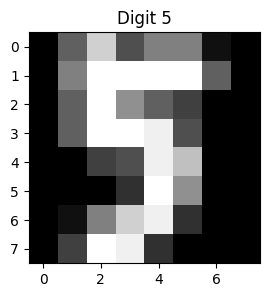

In [ ]:
k=33

fig, ax = plt.subplots(figsize=(3,3) )
ax.imshow(mnist_points[k].reshape(8,8), cmap='gray')
ax.set_title('Digit ' + str(mnist_data_classes[k]))
plt.show()

PCA to 3d and plot digits

In [ ]:
pca3 = decomposition.PCA(n_components=3)
pca3.fit(mnist_points)
mnist_pca_reduced_3d = pca3.transform(mnist_points)



#iris_points_pca_2d = pca.transform(Z)
print(mnist_pca_reduced_3d.shape)

(600, 3)


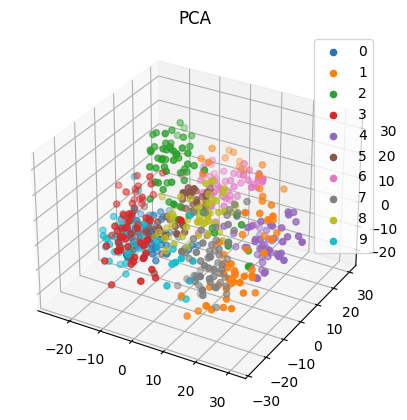

In [ ]:
fig_pca = plt.figure(1)
ax_pca = fig_pca.add_subplot(111, projection='3d')
ax_pca.set_title("PCA")

for wt in range(0,len(mnist_classes_names)):
    points_pca=mnist_pca_reduced_3d[mnist_data_classes == wt];
    ax_pca.scatter(points_pca[:,0], points_pca[:,1], points_pca[:,2], label=mnist_classes_names[wt])

ax_pca.legend()



# Q3.1
* a) From dataset MNIST extract only digits `1` and `4`. Performe PCA only on those digits. Plot `1` and `4` in 3d resulting from PCA on these digits and resulting from PCA performed on the whole dataset
* b) Do the same performing PCA 2d

## PCA: Color to grayscale

In [ ]:
img_nuclei = imageio.v3.imread('https://raw.githubusercontent.com/lorek/datasets/master/nuclei1b.jpg')
img_number = imageio.v3.imread('https://raw.githubusercontent.com/lorek/datasets/master/nr42.png')

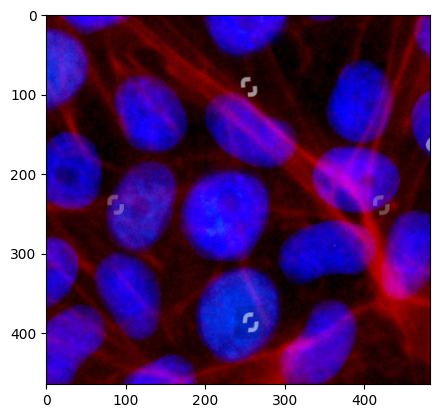

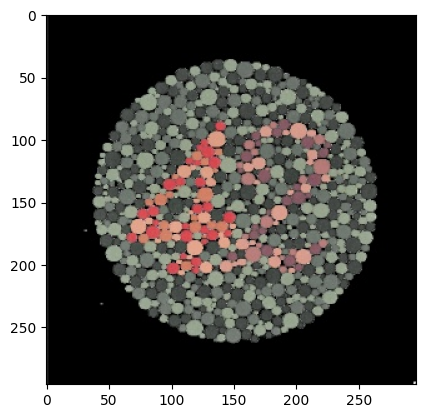

In [ ]:
plt.imshow(img_nuclei)
plt.show()
plt.imshow(img_number)
plt.show()


In [ ]:
print(img_nuclei.shape)

(465, 483, 3)


Color images $X$ == `np.array` of size $h\times w \times 3$, where $X[:,:,0]$ is a 2d array of red values, $X[:,:,1]$ or green values and $X[:,:,2]$ of blue values.
Thus, we may construct $n=h\cdot w$ three-dimenional points:

$$\mathbf{x}_0 =
\left(\begin{array}{ccc} X[0,0,0] \\X[0,0,1]\\ X[0,0,2]\\ \end{array}\right),
\mathbf{x}_1 =
\left(\begin{array}{ccc} X[0,1,0] \\X[0,1,1]\\ X[0,1,2]\\ \end{array}\right),
\ldots,
\mathbf{x}_{n-1} =
\left(\begin{array}{ccc} X[h-1,w-1,0] \\X[h-1,w-1,1]\\ X[h-1,w-1,2]\\ \end{array}\right),$$

# Q3.2

For both, `img_nuclei`, `img_number` perform:
* a) Plot 3d points $\mathbf{x_0},\ldots, \mathbf{x}_{n-1}$ (there will be many points -- take care to make point sizes small)
* b) Perform PCA, plot each component as a separate gray-scale image

# SVD:

In [ ]:
img_baboon = img_nuclei = imageio.v3.imread('https://raw.githubusercontent.com/lorek/datasets/master/baboon.bmp',pilmode='L')

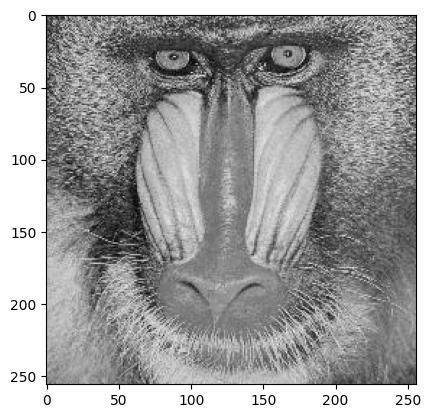

In [ ]:
plt.imshow(img_baboon,cmap='gray')
plt.show()

In [ ]:
U,eigenvals,VT=np.linalg.svd(img_baboon)

Lambda=np.diag(eigenvals)

In [ ]:
print("img_baboon.shape = ", img_baboon.shape)
print("U.shape = ", U.shape, " eigenvals.shape = ", eigenvals.shape, ", Lambda.shape = ", Lambda.shape, ", VT.shape = ", VT.shape)


img_baboon.shape =  (256, 256)
U.shape =  (256, 256)  eigenvals.shape =  (256,) , Lambda.shape =  (256, 256) , VT.shape =  (256, 256)


In [ ]:
def reconstr_matrix(U,D,VT,k):
    rec_mat=np.dot(U[:,:k],np.dot(D[:k,:k],VT[:k,:]))
    return rec_mat

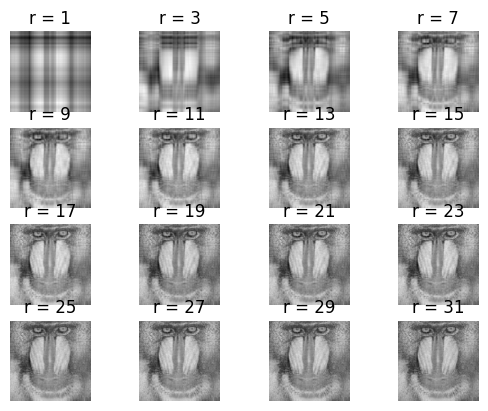

In [ ]:
nr_rows_cols=4
nr=1
how_much_rec=1
fig1=plt.figure(1);

for i in range(0,nr_rows_cols):
    for j in range(0, ile):
        plt.subplot(nr_rows_cols,nr_rows_cols,nr);
        rr=reconstr_matrix(U,Lambda,VT,how_much_rec)
        plt.imshow(rr, cmap=plt.get_cmap('gray'))
        plt.title("r = " + str(how_much_rec))
        plt.axis('off')
        how_much_rec+=2;
        nr+=1

# Q3.3
* a) In the above plot with reconstructions add the ratio $(\lambda_1+\ldots+\lambda_r)/(\lambda_1+\ldots+\lambda_d)$ in the title of each image.
* b) make a separate 2d plot: on $x$-axis there should be $r$, on $y$-axis there should be $||\mathbf{Z}-\mathbf{Z}_r||^2$.
* c) for what $r$ do we have $(\lambda_1+\ldots+\lambda_r)/(\lambda_1+\ldots+\lambda_d)\geq 0.95$ ?

# lfw PEOPLE faces

In [ ]:
image_data = datasets.fetch_lfw_people()

In [ ]:
lfw_dataset = datasets.fetch_lfw_people()
# limit
max_n=1000
lfw_images =        lfw_dataset.images[:max_n]
lfw_data_classes =  lfw_dataset.target[:max_n]
lfw_classes_names  =     lfw_dataset.target_names

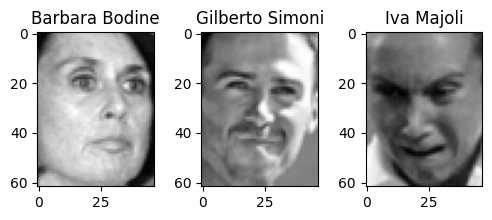

In [ ]:
plt.figure(figsize=(6,2))
plt.subplot(1,3,1);
plt.imshow(lfw_images[5], cmap='gray')
plt.title(lfw_classes_names[lfw_data_classes[5]])
plt.subplot(1,3,2);
plt.imshow(lfw_images[43], cmap='gray')
plt.title(lfw_classes_names[lfw_data_classes[43]])
plt.subplot(1,3,3);
plt.imshow(lfw_images[53], cmap='gray')
plt.title(lfw_classes_names[lfw_data_classes[53]])
plt.show()

In [ ]:
#nr of images = d
d=lfw_images.shape[0]

# "nr of points " = height * width
height = lfw_images.shape[1]
width =  lfw_images.shape[2]

n=height*width



In [ ]:
all_images_as_columns = np.zeros((n,d))

for nr in np.arange(d):
  image = lfw_images[nr].reshape(-1)
  all_images_as_columns[:,nr]=image


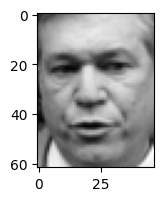

In [ ]:
# sanity check, column 33
plt.figure(figsize=(3,2))
image33=all_images_as_columns[:,33]
plt.imshow(image33.reshape(height,width),cmap='gray')

In [ ]:
U,eigenvals,VT=np.linalg.svd(all_images_as_columns,full_matrices=False)

Lambda = np.diag(eigenvals)
print("U.shape = ", U.shape, " eigenvals.shape = ", eigenvals.shape, ", Lambda.shape = ", Lambda.shape, ", VT.shape = ", VT.shape)


U.shape =  (2914, 1000)  eigenvals.shape =  (1000,) , Lambda.shape =  (1000, 1000) , VT.shape =  (1000, 1000)


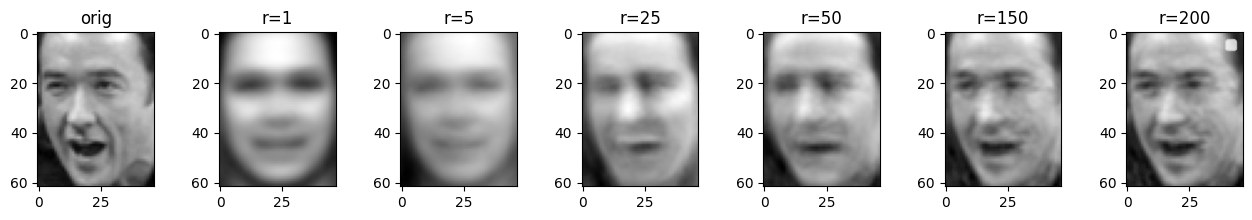

In [ ]:
plt.figure(figsize=(16,2))

# reconstruct for r = 1,2,5, 15, 25

r_list = [1,5,25, 50 ,150, 200]

plt.subplot(1,len(r_list)+1,1);
plt.imshow(lfw_images[12],cmap='gray')
plt.title("orig")
for nr,r in enumerate(r_list):
  faces_reconstructed=np.dot(U[:,:r],np.dot(Lambda[:r,:r],VT[:r,:]))
  plt.subplot(1,len(r_list)+1,nr+2);
  plt.imshow(faces_reconstructed[:,12].reshape(height,width),cmap='gray')
  plt.title("r="+str(r))

plt.legend()
plt.show()


# Q3.4

* Extend the above: sample randomly 6 images, show reconstruction of each one in a separate row
* In example presented above we showed: orig, r=1, r=5, r=25, r=50, r=150, r=200. Add one more colum: with  (smallest) $r$ that $(\lambda_1+\ldots+\lambda_r)/(\lambda_1+\ldots+\lambda_d)\geq0.9$ (for all faces)

## kernel PCA

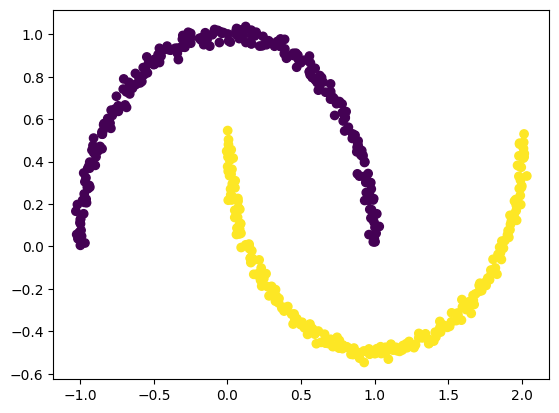

In [ ]:
# moons "dataset" (distribution):

import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.02, random_state=417)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

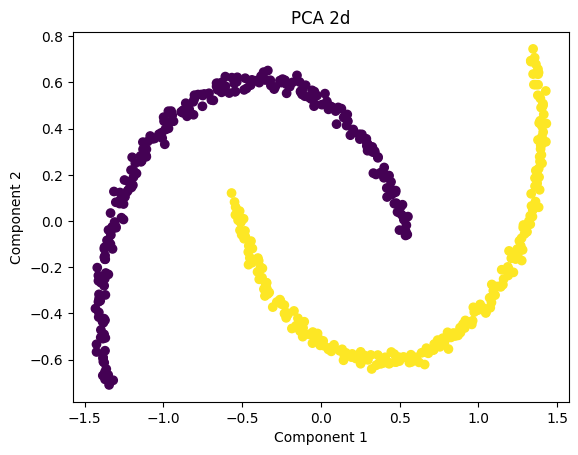

In [ ]:

pca2d = decomposition.PCA(n_components=2)
X_pca2d = pca2d.fit_transform(X)

plt.title("PCA 2d")
plt.scatter(X_pca2d[:, 0], X_pca2d[:, 1], c=y)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

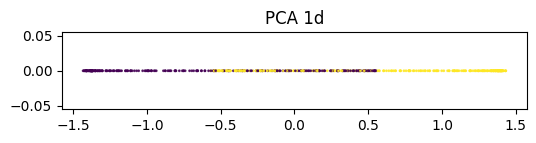

In [ ]:
pca1d = decomposition.PCA(n_components=1)
X_pca1d = pca1d.fit_transform(X)

plt.figure(figsize=(6,1))
plt.title("PCA 1d")
plt.scatter(X_pca1d , np.zeros(X_pca1d.shape[0]), c=y, s=1, alpha=0.8)
plt.show()

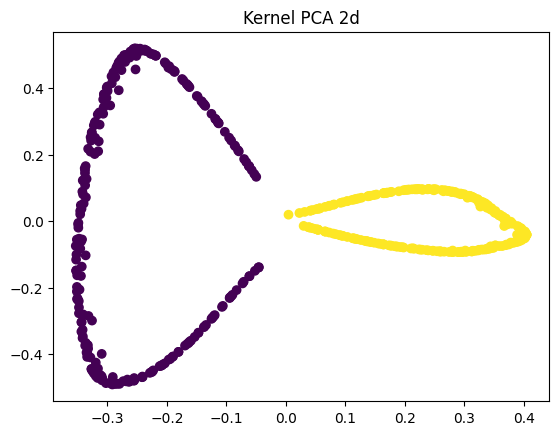

In [ ]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(kernel='rbf', gamma=15)
X_kpca = kpca.fit_transform(X)

plt.title("Kernel PCA 2d")
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y)
plt.show()

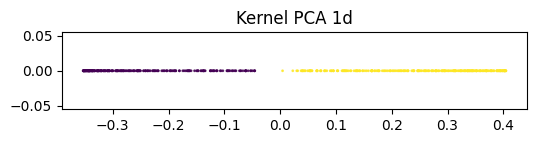

In [ ]:

plt.figure(figsize=(6,1))
plt.title("Kernel PCA 1d")
plt.scatter(X_kpca[:, 0],  np.zeros(len(X_kpca[:, 0])), c=y, s=1, alpha=0.8)
plt.show()

In [ ]:
# make circles
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000, factor=0.3, noise=0.05, random_state=0)


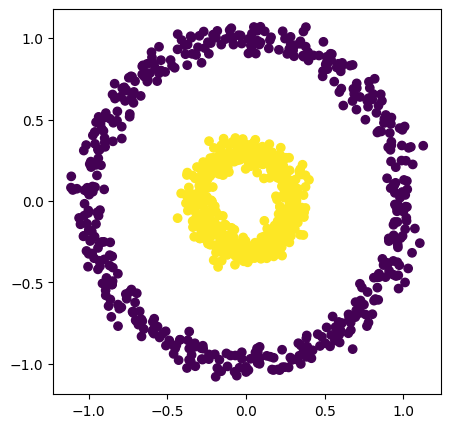

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

# Q3.5
* a) Perform PCA to 1d for "circles"
* b) From "circles" convert each point $\mathbf{x}=(x,y)$ to $\mathbf{x}'=\left(x,y, \exp\left({x^2+y^2\over 1.25}\right)\right)$ and draw them (keep the same colors). Plot them.
* c) Perform PCA to 1d for transformed $\mathbf{x}_1',\mathbf{x}_2',\ldots$
* d) Perform kernel PCA for "circles", try several different kernels with different parameters, try to find one such that points projected to 1d are separable
* e) Going back to moons: try different parameter `gamma`, try different kernels.
